# Intro to Data Science Final Tutorial
### Introductionto Data Scicence - Professor Nicholas Mattei
### Zekun Wu, Tianhao Wu


Here's the link to our website: https://zekunsamwu.github.io


Data source: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset

https://www.census.gov/newsroom/press-kits/2018/pop-estimates-national-state.html


We choose the data of "bad driver" because this dataset is mainly focused on the number of accidents each driver involved and how many of them are caused by multiple reasons like alcohol or speeding and so on. This dataset includes all the 52 states in America, which means the size of the data is large. Most of the data number is from national Commissioners or administration.  We can analyze the relationship between each driver's accident rate and their insurance rates, thus we can evaluate how well the insurance company's quote system works. For example, if we find out that a state has a relatively high insurance rate but the accident rates are not comparably high, we can then conclude that the insurance company is not fair to the drivers in that state. This is a social issue that is related to lots of citizens. This dataset has tons of numerical data. Some of them are an interval, as the “number of drivers involved in fatal collisions per billion miles”. Some of them are Ratio, like “Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding”. The size of this data set is perfect for our tutorial. If the dataset is too large, it will take too much time to compile, which is not good for presenting.


We also choose the Students Performance in Exams Dataset found on the Kaggle website. The dataset consists of both categorical variables and numerical variables. It shows the relationship between exam scores of various subjects, race, parental education, lunch type, and test preparation course. The amount of variables within the column variable is limited so that the result and data filtering for our tutorial will look effective and straightforward. Also, similar to the other dataset we chose, this dataset is a great combination for both categorical and numerical data which presents great potential to analyze and data visualization. We are encouraging students to explore the dataset and understand the influence of the parent’s background, test preparation, and other factors on students' performance. We also hope that this dataset can inspire students to explore what are important factors to get a high score by analyzing data and make their own study plan. We want to use this dataset as examples of data curation, parsing, visualization, and hypothesis testing. 



# Extraction, Transform, and Load¶


### Loading both datasets and concatenation

Finally we decide to go with the bad driving data size. We want to also include the factor of how population involved towards to the reason for fatality in car accident.Thus, we join the population data according to the state at the same year for the preparation of our data analysis. 

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

df_driver = pd.read_csv("./data/bad-drivers.csv")
df_driver.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [101]:
pops = pd.read_csv("./data/population.csv")
pops.head()

,state,Population
0,Alabama,"4,779,736"
1,Alaska,"710,231"
2,Arizona,"6,392,017"
3,Arkansas,"2,915,918"
4,California,"37,253,956"


In [102]:
df2 = pd.concat([df_driver,pops], axis = 1)
df_raw = df2.drop(columns = ["state"], axis = 1)
df_raw.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Population
0,Alabama,18.8,39,30,96,80,784.55,145.08,"4,779,736"
1,Alaska,18.1,41,25,90,94,1053.48,133.93,"710,231"
2,Arizona,18.6,35,28,84,96,899.47,110.35,"6,392,017"
3,Arkansas,22.4,18,26,94,95,827.34,142.39,"2,915,918"
4,California,12.0,35,28,91,89,878.41,165.63,"37,253,956"


### Transform the data from percentage to decimal for easier plotting

In [103]:
per_columns = ["Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding",
                     "Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired",
                     "Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted",
                     "Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents"
                     ]
df_raw[per_columns] = df_raw[per_columns].astype(float)/100
df_raw.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Population
0,Alabama,18.8,0.39,0.30,0.96,0.80,784.55,145.08,"4,779,736"
1,Alaska,18.1,0.41,0.25,0.90,0.94,1053.48,133.93,"710,231"
2,Arizona,18.6,0.35,0.28,0.84,0.96,899.47,110.35,"6,392,017"
3,Arkansas,22.4,0.18,0.26,0.94,0.95,827.34,142.39,"2,915,918"
4,California,12.0,0.35,0.28,0.91,0.89,878.41,165.63,"37,253,956"


Here, we transform some of the negative percentage to the positive by distracting the negative percentage by 1

In [104]:
df_raw["Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted"] = 1 - df_raw["Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted"]
df_raw["Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents"] = 1 - df_raw["Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents"]
df_raw.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($),Population
0,Alabama,18.8,0.39,0.30,0.04,0.20,784.55,145.08,"4,779,736"
1,Alaska,18.1,0.41,0.25,0.10,0.06,1053.48,133.93,"710,231"
2,Arizona,18.6,0.35,0.28,0.16,0.04,899.47,110.35,"6,392,017"
3,Arkansas,22.4,0.18,0.26,0.06,0.05,827.34,142.39,"2,915,918"
4,California,12.0,0.35,0.28,0.09,0.11,878.41,165.63,"37,253,956"


In [105]:
new_name = ["state", 
                "num_driver_fatal",
                "percent_speeding", 
                "percent_alcohol", 
                "percent_distracted", 
                "percent_record", 
                "insurance_premium",
                "Insurance_lost_per_driver",
           "population"]

df_raw2=df_raw.rename(columns=dict(zip(df_raw.columns,new_name)))
df_raw2.head()

,state,num_driver_fatal,percent_speeding,percent_alcohol,percent_distracted,percent_record,insurance_premium,Insurance_lost_per_driver,population
0,Alabama,18.8,0.39,0.30,0.04,0.20,784.55,145.08,"4,779,736"
1,Alaska,18.1,0.41,0.25,0.10,0.06,1053.48,133.93,"710,231"
2,Arizona,18.6,0.35,0.28,0.16,0.04,899.47,110.35,"6,392,017"
3,Arkansas,22.4,0.18,0.26,0.06,0.05,827.34,142.39,"2,915,918"
4,California,12.0,0.35,0.28,0.09,0.11,878.41,165.63,"37,253,956"


In [106]:
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
state                        51 non-null object
num_driver_fatal             51 non-null float64
percent_speeding             51 non-null float64
percent_alcohol              51 non-null float64
percent_distracted           51 non-null float64
percent_record               51 non-null float64
insurance_premium            51 non-null float64
Insurance_lost_per_driver    51 non-null float64
population                   51 non-null object
dtypes: float64(7), object(2)
memory usage: 3.7+ KB


At this point, we've finished out data Extraction, Transformation and loaded our data successfully. Note that we did not extrat data from the original dataset since we find all these factors can be taken into account for analyzing bad drivers. 

To summary, We found no missing data in and 9 columns/attributes in our dataset. We are now ready for some Exploratory Data Analysis (EDA).

# Exploratory Data Analysis

After we rename the variable name, our dataset looks much more clear and understandable. The next thing we are cruious about is the corelatinship between each driver's monthly insurance rate the total number of accidient rate happened in the state. So we make a scatter plot graph. 

Text(-1.5749999999999957, 0.5, 'State average insurance rate')

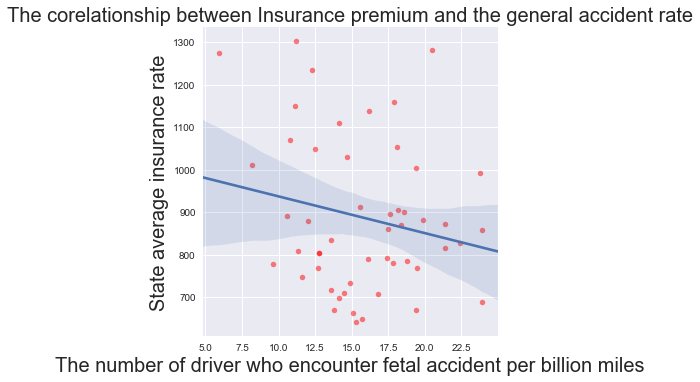

In [107]:
sns.lmplot(x='num_driver_fatal',y='insurance_premium',fit_reg=True,scatter_kws={"color":"red","alpha":0.5
                                                                               ,"s":30},data=df_raw2)
plt.title('The corelationship between Insurance premium and the general accident rate', fontsize=20)
plt.xlabel('The number of driver who encounter fetal accident per billion miles',size=20)
plt.ylabel('State average insurance rate',size=20)



In [108]:
df_raw2['num_driver_fatal'].corr(df_raw2['insurance_premium'])

-0.1997019456899423

According to the graph and the covarience value, there is no straight relationship between the insurance premium and the number of drivers involved in fatal collisions per billion miles, which can also be interpreted as the major accident heppene rate in each state. The covarience value is only -1.99. Sometimes the lower accident rate state driver can be charged more than those state with higher accident state. It looks unfair to our general knowledge.  We are trying to find out the quote system of the insurance company. In order to figure this out, we did a scatter plot between Losses incurred by insurance companies for collisions per insured driver and the insurance premium.

Text(-1.5749999999999957, 0.5, 'State average insurance rate')

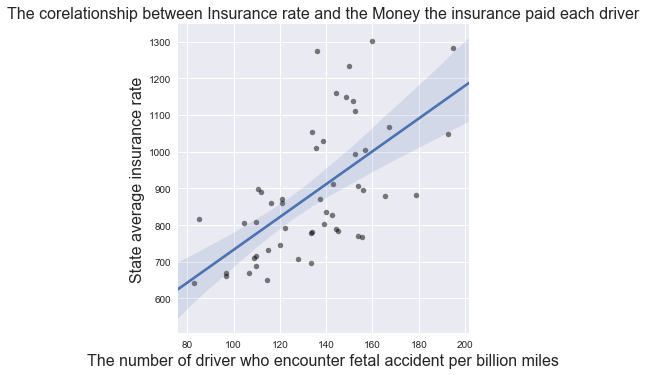

In [109]:
sns.lmplot(x='Insurance_lost_per_driver',y='insurance_premium',fit_reg=True,scatter_kws={"color":"black","alpha":0.5
                                                                               ,"s":30},data=df_raw2)
plt.title("The corelationship between Insurance rate and the Money the insurance paid each driver", fontsize=16)
plt.xlabel('The number of driver who encounter fetal accident per billion miles',size=16)
plt.ylabel('State average insurance rate',size=16)

In [110]:
df_raw2['num_driver_fatal'].corr(df_raw2['Insurance_lost_per_driver'])

-0.0360110816450992